<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:
·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·      LSTAT - % lower status of the population
·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
# 1. Data set overview
print(boston_df.columns)
boston_df.head()

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe().round(2)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,0.00,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,126.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,252.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,378.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,505.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

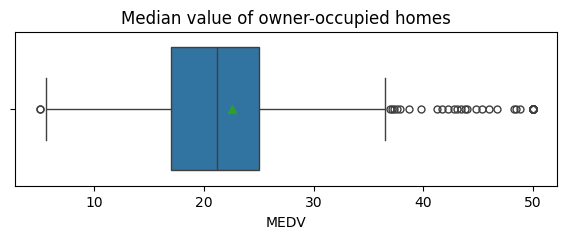

In [8]:
# Data visualizations 1
# "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(7, 2))
sns.boxplot(data=boston_df, x='MEDV', showmeans=True, fliersize=5).set(title='Median value of owner-occupied homes')


The box plot for the MEDV show that there is a concentration of values around the mean and some outliers with very low price and very high price

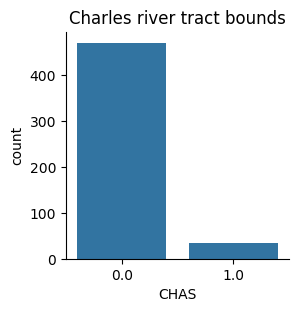

In [9]:
# Data visualizations 2
# Provide a bar plot for the Charles river variable
sns.catplot(data=boston_df, x='CHAS',kind='count',height=3, aspect=1).set(title='Charles river tract bounds')

The chart of the Charles river track bounds shows that there are more houses not in the bounds

[Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')]

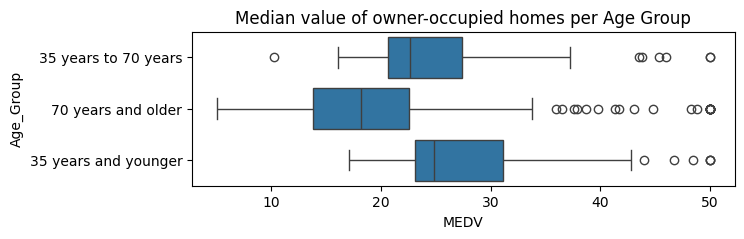

In [10]:
# Data visualizations 3
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable
# into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = '35 years to 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

pyplot.figure(figsize=(7, 2))
sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df).set (title='Median value of owner-occupied homes per Age Group')

Median value of owner-occupied homes per Age Group chart shows that the value of the houses decrease with the age of the houses. Newest houses are in average more expensive that oldest houses

[Text(0.5, 1.0, 'Nitric oxide concentrations & proportion of non-retail business acres per town')]

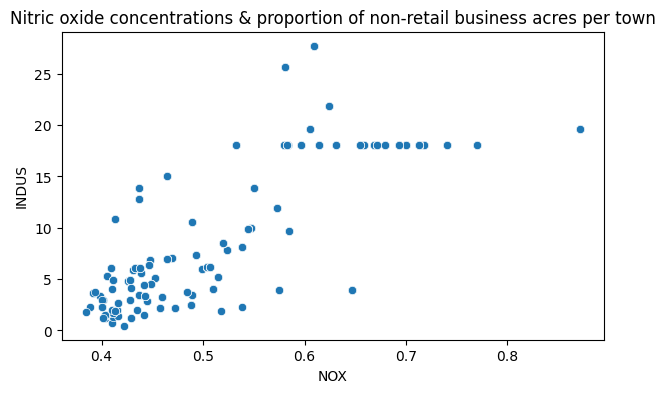

In [11]:
# Data visualizations 4
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the 
# proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.figure(figsize=(7, 4))

sns.scatterplot(data=boston_df, x="NOX", y="INDUS").set(title='Nitric oxide concentrations & proportion of non-retail business acres per town')


Low proportion of non retail business have low level of Nox but that is not conclusive

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

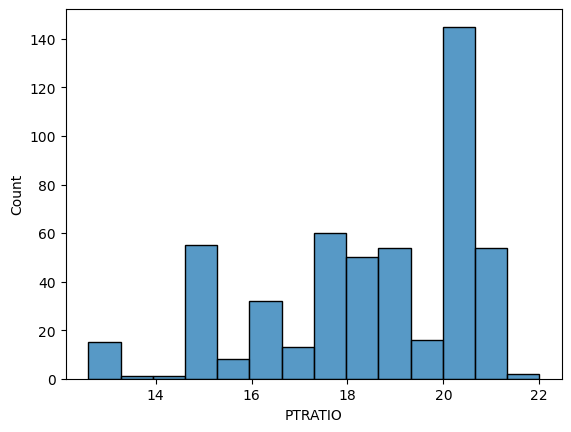

In [12]:
# Data visualizations 5
#  Create a histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x="PTRATIO")

Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? 


[Text(0.5, 1.0, 'Value of houses bounded by the Charles river or not')]

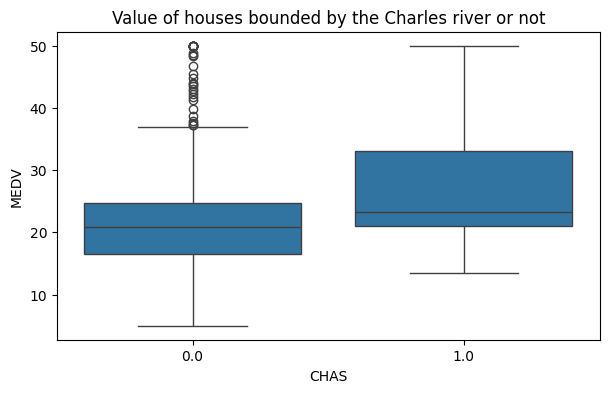

In [13]:
pyplot.figure(figsize=(7, 4))

sns.boxplot(data=boston_df, x="CHAS", y="MEDV").set(title='Value of houses bounded by the Charles river or not')


We could say that visually it seams there is a difference on the average price for a house base on the fact 
that the house is close to the river, but we want the numbers to certify that
Then we make our hypothesis
H0 The average price of a house is independent of the proximity to the river (mu1-mu2 equal 0)
H1 The average price of a house depend of the proximity to the river (mu1-mu2 not equal to 0)

If the p value is bigger than 0.05 we will validate HO (Null hypothesis)

We will use a T-test as we deal with independent samples



In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

T Test result show a p value of 0.003, we reject the null hypothesis as the p value lower than 0.05 means there is a difference in the average price of the houses if they are close or not to the river
As the p value is positive we could say that being close to the river makes average price bigger


Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

[Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')]

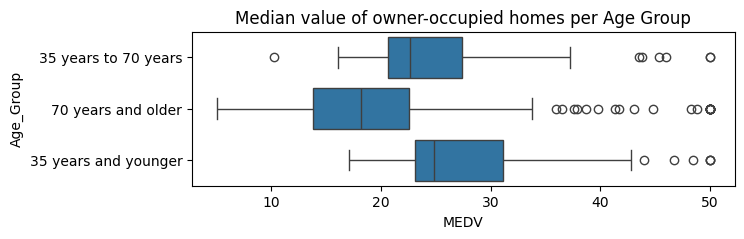

In [26]:
pyplot.figure(figsize=(7, 2))
sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df).set (title='Median value of owner-occupied homes per Age Group')

We could say that visually it seams there is a difference on the average price for a house base on the age of the house, being more expensive in average the ones youngers and low expensive in average the older ones, but we want the numbers to certify that

Then we make our hypothesis
H0 The average price of a house is independent of their age (mu1=mu2=mu3 )
H1 The average price of a house depend of their age (mu1,mu2 and mu3 are not equal)

If the p value is bigger than 0.05 we will validate HO (Null hypothesis)

We will use ANOVA as we have agregate the data in 3 ages groups ('35 years and younger', '35 years to 70 years','70 years and older'), the same we used for the plot visualization

In [37]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == '35 years to 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

ANOVA test result show a p value 0.00000000000000017. We reject the null hypothesis as the p value lower than 0.05 means there is a difference in the average price of the houses depending on the age of the house.

Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


[Text(0.5, 1.0, 'Nitric oxide concentrations & proportion of non-retail business acres per town')]

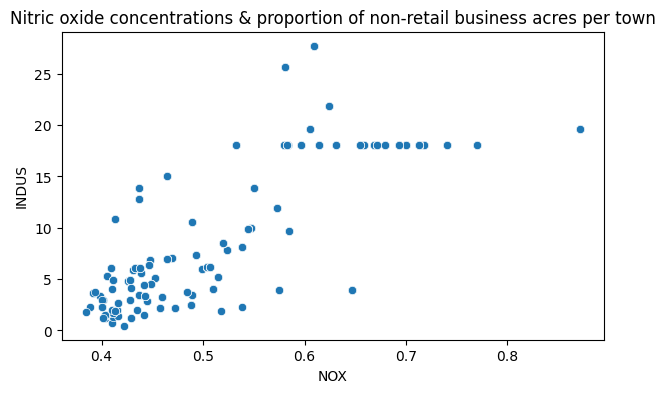

In [38]:
pyplot.figure(figsize=(7, 4))

sns.scatterplot(data=boston_df, x="NOX", y="INDUS").set(title='Nitric oxide concentrations & proportion of non-retail business acres per town')


The chart shows an apparelty relation on the Nitric oxide concentrations & proportion of non-retail business acres per town but we need to confirm using statitic analysis 

Then we make our hypothesis
H0 The Nitric oxide concentrations is independent of proportion of non-retail business acres (mu1=mu2 )
H1 The Nitric oxide concentrations depend of proportion of non-retail business acres  (mu1-mu2 not equal to 0)

If the p value is bigger than 0.05 we will validate HO (Null hypothesis)

We want to check if there is a linear correlation between the nitric oxide concentratin and the proportion of non-retail business acres, the we will use the Pearson correlation to measures the strength of the linear relationship between the two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.


In [40]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The p value is lower than 0.05 then we can refuse the null hypothesis and we can conclude there is a relation between the two variables. As the statistic is 0.76 we can conclude that ther is a high positive correlation between the Nitric oxide concentrations and the proportion of non-retail business acres

Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



[Text(0.5, 1.0, 'Weighted distances to five Boston employment centres & median value of owner occupied homes')]

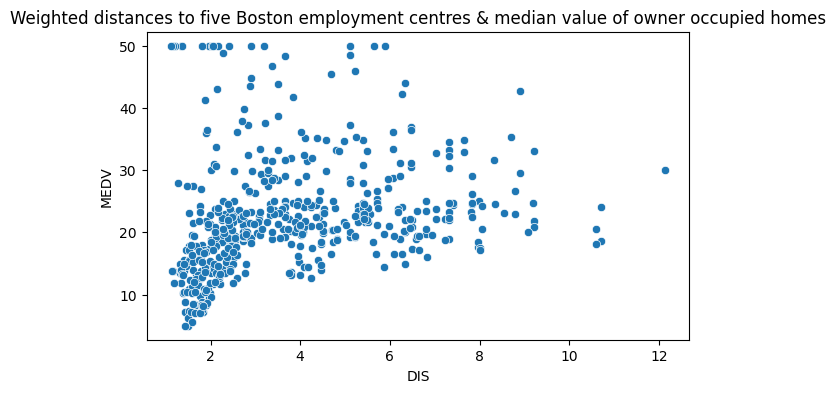

In [42]:
pyplot.figure(figsize=(7, 4))

sns.scatterplot(data=boston_df, x="DIS", y="MEDV").set(title='Weighted distances to five Boston employment centres & median value of owner occupied homes')


The chart shows an apparelty relation on weighted distance to the five Boston employment centres on the median value of owner occupied homes but we want to be able to predict that effect using statistic analasys 
Then we make our hypothesis
H0 The median value of owner occupied homes is independent of the weighted distance to the five Boston employment centres (mu1=mu2 )
H1 The median value of owner occupied homes depend on the weighted distance to the five Boston employment centres (mu1-mu2 not equal to 0)

If the p value is bigger than 0.05 we will validate HO (Null hypothesis)



In [44]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        23:23:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the summary table, we can see that P-value for both parameters is equal to 0. That means we can reject the null hypothesis at almost every significance level  and we can say that the median value of owner occupied homes depend on the weighted distance to the five Boston employment centres 